In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [40]:
data = pd.read_parquet('../models/linear_model_v5/training_log.parquet')

In [41]:
# data.to_csv('./plots/training_log.csv', index=False)

In [42]:
eval_metrics_data = data[~data['eval_loss'].isnull()]

In [43]:
eval_metrics_data

,loss,learning_rate,epoch,step,eval_loss,eval_accuracy_metric,eval_precision_metric,eval_recall_metric,eval_f1_metric,eval_matthews_correlation,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
150,NaN,NaN,0.19,150,0.312319,0.904834,0.904834,0.904834,0.904834,0.203015,260.4480,15.930,0.998,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,0.39,300,0.171633,0.927683,0.927683,0.927683,0.927683,0.236499,258.2850,16.064,1.007,NaN,NaN,NaN,NaN,NaN
452,NaN,NaN,0.58,450,0.141002,0.942606,0.942606,0.942606,0.942606,0.259352,261.0593,15.893,0.996,NaN,NaN,NaN,NaN,NaN
603,NaN,NaN,0.77,600,0.126532,0.950468,0.950468,0.950468,0.950468,0.266294,261.3634,15.874,0.995,NaN,NaN,NaN,NaN,NaN
754,NaN,NaN,0.96,750,0.121012,0.952217,0.952217,0.952217,0.952217,0.268881,260.5797,15.922,0.998,NaN,NaN,NaN,NaN,NaN


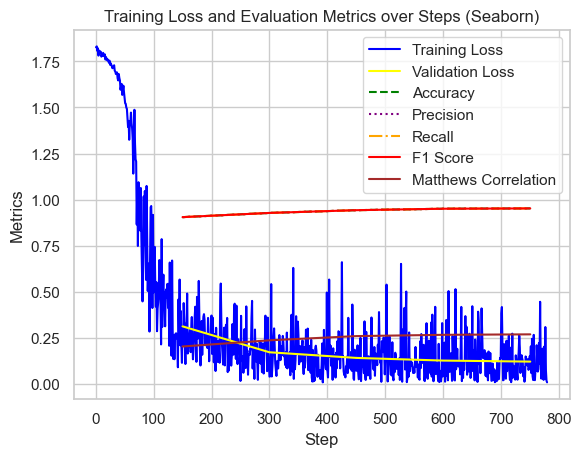

In [47]:
sns.lineplot(x=data['step'], y=data['loss'], label='Training Loss', color='blue')
sns.lineplot(x=data['step'], y=data['eval_loss'], label='Validation Loss', color='yellow')
sns.lineplot(x=eval_metrics_data['step'], y=eval_metrics_data['eval_accuracy_metric'], label='Accuracy', linestyle='--', color='green')
sns.lineplot(x=eval_metrics_data['step'], y=eval_metrics_data['eval_precision_metric'], label='Precision', linestyle=':', color='purple')
sns.lineplot(x=eval_metrics_data['step'], y=eval_metrics_data['eval_recall_metric'], label='Recall', linestyle='-.', color='orange')
sns.lineplot(x=eval_metrics_data['step'], y=eval_metrics_data['eval_f1_metric'], label='F1 Score', linestyle='-', color='red')
sns.lineplot(x=eval_metrics_data['step'], y=eval_metrics_data['eval_matthews_correlation'], label='Matthews Correlation', linestyle='-', color='brown')

plt.xlabel('Step')
plt.ylabel('Metrics')
plt.title('Training Loss and Evaluation Metrics')

plt.legend()
plt.show()